In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
t1 = np.pi/15
t2 = -np.pi/9
t3 = -np.pi/20
theta= np.array([t1, t2, t3])

Rx = np.array([[1, 0, 0],
    [0, np.cos(t1), -np.sin(t1)],
    [0, np.sin(t1), np.cos(t1)]])

Ry = np.array([[np.cos(t2), 0, np.sin(t2)],
    [0, 1, 0],
    [-np.sin(t2), 0, np.cos(t2)]])

Rz = np.array([[np.cos(t3), -np.sin(t3), 0],
    [np.sin(t3), np.cos(t3), 0],
    [0, 0, 1]])
Sigma = np.diag([3, 1, 0.5])


In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
def draw_transformation(X):
    fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
    ax1:Axes3D = ax1
    u = np.linspace(-np.pi, np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    #Plot the surface
    surf1 = ax1.plot_surface(x,y,z, cmap='jet', alpha=0.6, linewidth=0.1)
    surf1.set_edgecolor('k')
    ax1.set_xlim3d(-3,3)
    ax1.set_ylim3d(-3,3)
    ax1.set_zlim3d(-3,3)

    xR = np.zeros_like(x)
    yR = np.zeros_like(y)
    zR = np.zeros_like(z)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            vec = [x[i,j], y[i,j], z[i,j]]
            vecR = X @ vec
            xR[i,j] = vecR[0]
            yR[i,j] = vecR[1]
            zR[i,j] = vecR[2]

    fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
    ax2:Axes3D = ax2

    surf2 = ax2.plot_surface(xR,yR,zR, cmap='jet', alpha=0.6, linewidth=0.1)
    surf2.set_edgecolor('k')
    ax2.set_xlim3d(-3,3)
    ax2.set_ylim3d(-3,3)
    ax2.set_zlim3d(-3,3)


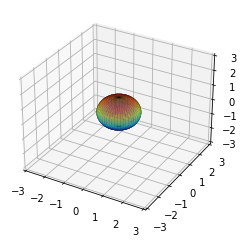

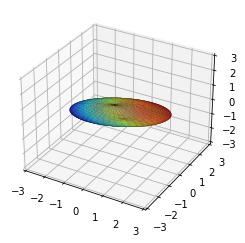

In [29]:
X = Rz@Ry@Rx@Sigma
draw_transformation(X)

# SVD

Original transformation X is a mix or rotations and stretching. We can prove that SVD does exackly that - decomposing matrix into unitary U (and V) that represent rotational part and S (sigma) representing warping of the input space.

## Warping and rotating

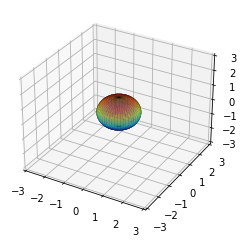

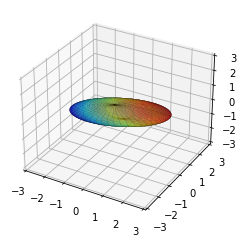

In [30]:
X = Rz@Ry@Rx@Sigma
U,S,VT = np.linalg.svd(X)
X = U @ np.diag(S)
draw_transformation(X)

## Only rotation

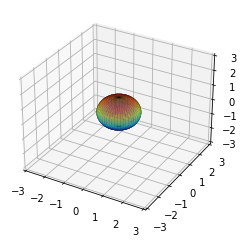

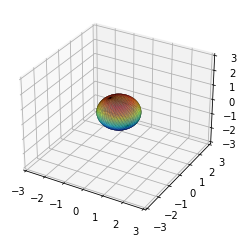

In [31]:
X = Rz@Ry@Rx@Sigma
U,S,VT = np.linalg.svd(X)
X = U
draw_transformation(X)

## Only warping

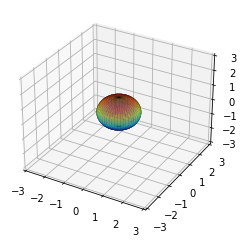

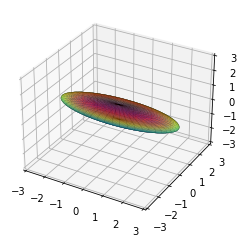

In [32]:
X = Rz@Ry@Rx@Sigma
U,S,VT = np.linalg.svd(X)
X = np.eye(3) @ np.diag(S)
draw_transformation(X)

## Note

This S (from decomposition) is the same as Sigma defined at the begninning

In [33]:
np.diag(S)

array([[3. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 0.5]])

In [34]:
Sigma

array([[3. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 0.5]])

## Note
VT matrix is almost identity matrix. SVD decomposition is unique up to the sign values.

In [35]:
VT

array([[-1.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.11022302e-16],
       [-0.00000000e+00, -1.00365734e-16, -1.00000000e+00]])